# Notebook for Analysing Twitter data

# 1. Loading Libraries
 All Python capabilities are not loaded into our working environment by default (even those that are already installed in your system). So, we import each and every library that we want to use.

In [1]:
#!pip3 install -U emoji

In [1]:
!pip install df2gspread

  Created wheel for df2gspread: filename=df2gspread-1.0.4-py3-none-any.whl size=11955 sha256=f28022c1dcea25d6e26b52831ea1eea940bc28cb1ef3e5141aa2efa48f62430e
  Stored in directory: c:\users\munangiwa\appdata\local\pip\cache\wheels\53\32\9b\26e210feef010738b204c7e12454b1ce9576957f66ca64456d
Successfully built df2gspread
  Attempting uninstall: uritemplate
    Found existing installation: uritemplate 4.1.1
    Uninstalling uritemplate-4.1.1:
      Successfully uninstalled uritemplate-4.1.1
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.43.0
    Uninstalling google-api-python-client-2.43.0:
      Successfully uninstalled google-api-python-client-2.43.0


In [2]:
#installing tweet-preprocessor
#!pip install tweet-preprocessor

In [3]:
#installing ekphrasis
#!pip install ekphrasis

In [4]:
from ekphrasis.classes.segmenter import Segmenter

In [5]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
import nltk
import preprocessor as p
import datetime as dt

In [6]:
#important libraries for preprocessing using NLTK
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Munangiwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Munangiwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# read in the data

DataScienceDojo = pd.read_csv("user_Twitter_data_DataScienceDojo.csv")
coursera = pd.read_csv("user_Twitter_data_coursera.csv")
getsmarter = pd.read_csv("user_Twitter_data_getsmarter.csv")
HypDev = pd.read_csv("user_Twitter_data_HypDev.csv")
Simplilearn = pd.read_csv("user_Twitter_data_Simplilearn.csv")
udacity= pd.read_csv("user_Twitter_data_udacity.csv")
ZindiAfrica = pd.read_csv("user_Twitter_data_ZindiAfrica.csv")
NYCDataSci = pd.read_csv("user_Twitter_data_NYCDataSci.csv")
I_T_Academy = pd.read_csv("user_Twitter_data_I_T_Academy.csv")
twoUinc = pd.read_csv("user_Twitter_data_2Uinc.csv")

In [8]:
I_T_Academy

,Username,Datetime,Tweet Id,Text,likeCount,Media,Source,ReplyCount,RetweetCount


In [9]:
df_all_rows = pd.concat([DataScienceDojo,coursera,getsmarter,HypDev,
                         Simplilearn,udacity,ZindiAfrica,NYCDataSci,I_T_Academy,twoUinc])

In [10]:
df_all_rows.head()

,Username,Datetime,Tweet Id,Text,likeCount,Media,Source,ReplyCount,RetweetCount
0,DataScienceDojo,2022-03-27 23:07:59+00:00,1508219309105029128,@Redisinc crash course for AI &amp; ML: This c...,0,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,0
1,DataScienceDojo,2022-03-27 20:08:00+00:00,1508174016820957184,💥 Data Science Workflow! \nSource: @CatherineA...,56,[Photo(previewUrl='https://pbs.twimg.com/media...,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",1,17
2,DataScienceDojo,2022-03-27 18:07:59+00:00,1508143811448479751,💡 This video talks about the different types o...,3,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,2
3,DataScienceDojo,2022-03-27 14:07:59+00:00,1508083416327143430,📜 Here is a list of the 20 most followed AI in...,16,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",2,12
4,DataScienceDojo,2022-03-27 02:02:59+00:00,1507900961179766789,✔️ This video talks about the diverse types of...,4,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,1


In [11]:
df_all_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12910 entries, 0 to 508
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Username      12910 non-null  object
 1   Datetime      12910 non-null  object
 2   Tweet Id      12910 non-null  object
 3   Text          12910 non-null  object
 4   likeCount     12910 non-null  object
 5   Media         4678 non-null   object
 6   Source        12910 non-null  object
 7   ReplyCount    12910 non-null  object
 8   RetweetCount  12910 non-null  object
dtypes: object(9)
memory usage: 1008.6+ KB


## Text Preprocessing

In [12]:
#List of all hashtags added to a new column as a new feature ‘hashtag’
df_all_rows['hashtag'] = df_all_rows['Text'].apply(lambda x: re.findall(r"#(\w+)", x))

In [13]:
df_all_rows.head()

,Username,Datetime,Tweet Id,Text,likeCount,Media,Source,ReplyCount,RetweetCount,hashtag
0,DataScienceDojo,2022-03-27 23:07:59+00:00,1508219309105029128,@Redisinc crash course for AI &amp; ML: This c...,0,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,0,[]
1,DataScienceDojo,2022-03-27 20:08:00+00:00,1508174016820957184,💥 Data Science Workflow! \nSource: @CatherineA...,56,[Photo(previewUrl='https://pbs.twimg.com/media...,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",1,17,"[DataScience, WorkFlow, AI]"
2,DataScienceDojo,2022-03-27 18:07:59+00:00,1508143811448479751,💡 This video talks about the different types o...,3,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,2,[]
3,DataScienceDojo,2022-03-27 14:07:59+00:00,1508083416327143430,📜 Here is a list of the 20 most followed AI in...,16,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",2,12,"[DataScience, AI, Influencers, 2021]"
4,DataScienceDojo,2022-03-27 02:02:59+00:00,1507900961179766789,✔️ This video talks about the diverse types of...,4,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,1,"[LeadScoring, MarketingAnalytics, DSDojo]"


#### Cleaning is done using tweet-preprocessor package.

In [14]:
#segmenter using the word statistics from Twitter
#seg_tw = Segmenter(corpus='twitter')

In [15]:
#Cleaning using tweet-preprocessor
def preprocess_tweet(row):
    Text = row['Text']
    Text = p.clean(Text)
    return Text

In [16]:
df_all_rows['Text'] = df_all_rows.apply(preprocess_tweet, axis=1)

# Removing Digits and lower the text (makes it easy to deal with)
df_all_rows['Text'] = df_all_rows['Text'].astype(str).str.replace('\d+', '')
lower_text = df_all_rows['Text'] .str.lower()

# Remove extra white spaces, punctuation and apply lower casing
df_all_rows['Text'] = df_all_rows['Text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

In [17]:
df_all_rows.head(100)

,Username,Datetime,Tweet Id,Text,likeCount,Media,Source,ReplyCount,RetweetCount,hashtag
0,DataScienceDojo,2022-03-27 23:07:59+00:00,1508219309105029128,crash course for ai amp ml this crash course i...,0,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,0,[]
1,DataScienceDojo,2022-03-27 20:08:00+00:00,1508174016820957184,data science workflow source,56,[Photo(previewUrl='https://pbs.twimg.com/media...,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",1,17,"[DataScience, WorkFlow, AI]"
2,DataScienceDojo,2022-03-27 18:07:59+00:00,1508143811448479751,this video talks about the different types of ...,3,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,2,[]
3,DataScienceDojo,2022-03-27 14:07:59+00:00,1508083416327143430,here is a list of the most followed ai influen...,16,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",2,12,"[DataScience, AI, Influencers, 2021]"
4,DataScienceDojo,2022-03-27 02:02:59+00:00,1507900961179766789,this video talks about the diverse types of le...,4,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,1,"[LeadScoring, MarketingAnalytics, DSDojo]"
...,...,...,...,...,...,...,...,...,...,...
95,DataScienceDojo,2022-03-21 20:03:00+00:00,1505998431264948228,in data science there are no right answers ju...,55,[Photo(previewUrl='https://pbs.twimg.com/media...,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",1,17,"[DataScience, AI, ML, Opinion]"
96,DataScienceDojo,2022-03-21 18:03:47+00:00,1505968427302895618,explore how to incorporate data science and ai...,5,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",1,2,"[Kubernetes, AI, ML, DSDojo]"
97,DataScienceDojo,2022-03-21 14:03:09+00:00,1505907868955992069,this video talks about why it is important to ...,4,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,2,"[DirectTraffic, MarketingAnalytics, DataScience]"
98,DataScienceDojo,2022-03-21 02:01:00+00:00,1505726135132381184,top ai and data science tools and techniques f...,17,[Photo(previewUrl='https://pbs.twimg.com/media...,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,8,"[DataScience, AI, 2022]"


In [18]:
df_all_rows['Text']

0      crash course for ai amp ml this crash course i...
1                          data science workflow source 
2      this video talks about the different types of ...
3      here is a list of the most followed ai influen...
4      this video talks about the diverse types of le...
                             ...                        
504    be bold and fearlessthis is one of the guiding...
505    since partnering with u weve been introduced t...
506    find out how five entrepreneurs used u powered...
507    were thankful to partner with to help underrep...
508    when it comes to the future of online ed our c...
Name: Text, Length: 12910, dtype: object

In [19]:
# Converting the time from object type to datetime
df_all_rows['Datetime'] = pd.to_datetime(df_all_rows['Datetime'])

In [20]:
df_all_rows.head(1)

,Username,Datetime,Tweet Id,Text,likeCount,Media,Source,ReplyCount,RetweetCount,hashtag
0,DataScienceDojo,2022-03-27 23:07:59+00:00,1508219309105029128,crash course for ai amp ml this crash course i...,0,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,0,[]


In [21]:
df_all_rows.Datetime

0     2022-03-27 23:07:59+00:00
1     2022-03-27 20:08:00+00:00
2     2022-03-27 18:07:59+00:00
3     2022-03-27 14:07:59+00:00
4     2022-03-27 02:02:59+00:00
                 ...           
504   2021-01-06 13:14:01+00:00
505   2021-01-05 21:00:26+00:00
506   2021-01-05 17:53:01+00:00
507   2021-01-04 22:54:01+00:00
508   2021-01-04 20:18:10+00:00
Name: Datetime, Length: 12910, dtype: datetime64[ns, UTC]

In [22]:
df_all_rows['date'] = pd.to_datetime(df_all_rows['Datetime']).dt.date
#df_all_rows['time'] = pd.to_datetime(df_all_rows['Datetime']).dt.time
df_all_rows['hour']=pd.DatetimeIndex(df_all_rows.Datetime).hour

In [23]:
df_all_rows.head()

,Username,Datetime,Tweet Id,Text,likeCount,Media,Source,ReplyCount,RetweetCount,hashtag,date,hour
0,DataScienceDojo,2022-03-27 23:07:59+00:00,1508219309105029128,crash course for ai amp ml this crash course i...,0,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,0,[],2022-03-27,23
1,DataScienceDojo,2022-03-27 20:08:00+00:00,1508174016820957184,data science workflow source,56,[Photo(previewUrl='https://pbs.twimg.com/media...,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",1,17,"[DataScience, WorkFlow, AI]",2022-03-27,20
2,DataScienceDojo,2022-03-27 18:07:59+00:00,1508143811448479751,this video talks about the different types of ...,3,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,2,[],2022-03-27,18
3,DataScienceDojo,2022-03-27 14:07:59+00:00,1508083416327143430,here is a list of the most followed ai influen...,16,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",2,12,"[DataScience, AI, Influencers, 2021]",2022-03-27,14
4,DataScienceDojo,2022-03-27 02:02:59+00:00,1507900961179766789,this video talks about the diverse types of le...,4,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,1,"[LeadScoring, MarketingAnalytics, DSDojo]",2022-03-27,2


In [24]:
df_all_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12910 entries, 0 to 508
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Username      12910 non-null  object             
 1   Datetime      12910 non-null  datetime64[ns, UTC]
 2   Tweet Id      12910 non-null  object             
 3   Text          12910 non-null  object             
 4   likeCount     12910 non-null  object             
 5   Media         4678 non-null   object             
 6   Source        12910 non-null  object             
 7   ReplyCount    12910 non-null  object             
 8   RetweetCount  12910 non-null  object             
 9   hashtag       12910 non-null  object             
 10  date          12910 non-null  object             
 11  hour          12910 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(10)
memory usage: 1.3+ MB


In [25]:
# Adding week days 

df_all_rows['weekday'] = df_all_rows['Datetime'].apply(lambda x: dt.datetime.strftime(x, '%A'))

In [26]:
df_all_rows.head(1)

,Username,Datetime,Tweet Id,Text,likeCount,Media,Source,ReplyCount,RetweetCount,hashtag,date,hour,weekday
0,DataScienceDojo,2022-03-27 23:07:59+00:00,1508219309105029128,crash course for ai amp ml this crash course i...,0,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,0,[],2022-03-27,23,Sunday


In [27]:
# dropping unwated columns

df_all_rows = df_all_rows.drop(['Datetime','Text','Source','hashtag','Tweet Id'], axis=1)

In [28]:
df_all_rows

,Username,likeCount,Media,ReplyCount,RetweetCount,date,hour,weekday
0,DataScienceDojo,0,NaN,0,0,2022-03-27,23,Sunday
1,DataScienceDojo,56,[Photo(previewUrl='https://pbs.twimg.com/media...,1,17,2022-03-27,20,Sunday
2,DataScienceDojo,3,NaN,0,2,2022-03-27,18,Sunday
3,DataScienceDojo,16,NaN,2,12,2022-03-27,14,Sunday
4,DataScienceDojo,4,NaN,0,1,2022-03-27,2,Sunday
...,...,...,...,...,...,...,...,...
504,2Uinc,2,NaN,0,0,2021-01-06,13,Wednesday
505,2Uinc,5,NaN,0,1,2021-01-05,21,Tuesday
506,2Uinc,4,NaN,0,1,2021-01-05,17,Tuesday
507,2Uinc,1,NaN,0,1,2021-01-04,22,Monday


In [29]:
#replace NaN values in all columns with empty string
df_all_rows.fillna('Tweet', inplace=True)

In [30]:
df_all_rows

,Username,likeCount,Media,ReplyCount,RetweetCount,date,hour,weekday
0,DataScienceDojo,0,Tweet,0,0,2022-03-27,23,Sunday
1,DataScienceDojo,56,[Photo(previewUrl='https://pbs.twimg.com/media...,1,17,2022-03-27,20,Sunday
2,DataScienceDojo,3,Tweet,0,2,2022-03-27,18,Sunday
3,DataScienceDojo,16,Tweet,2,12,2022-03-27,14,Sunday
4,DataScienceDojo,4,Tweet,0,1,2022-03-27,2,Sunday
...,...,...,...,...,...,...,...,...
504,2Uinc,2,Tweet,0,0,2021-01-06,13,Wednesday
505,2Uinc,5,Tweet,0,1,2021-01-05,21,Tuesday
506,2Uinc,4,Tweet,0,1,2021-01-05,17,Tuesday
507,2Uinc,1,Tweet,0,1,2021-01-04,22,Monday


In [31]:
#Changing naming

df_all_rows.loc[ df_all_rows['Media'].str.contains('Photo'), 'Media'] = 'Tweet_Photo'
df_all_rows.loc[ df_all_rows['Media'].str.contains('Vid'), 'Media'] = 'Tweet_Video'
df_all_rows.loc[ df_all_rows['Media'].str.contains('Git'), 'Media'] = 'Tweet_GitHub'
df_all_rows.loc[ df_all_rows['Media'].str.contains('Gif'), 'Media'] = 'Tweet_Gif'

In [32]:
 df_all_rows

,Username,likeCount,Media,ReplyCount,RetweetCount,date,hour,weekday
0,DataScienceDojo,0,Tweet,0,0,2022-03-27,23,Sunday
1,DataScienceDojo,56,Tweet_Photo,1,17,2022-03-27,20,Sunday
2,DataScienceDojo,3,Tweet,0,2,2022-03-27,18,Sunday
3,DataScienceDojo,16,Tweet,2,12,2022-03-27,14,Sunday
4,DataScienceDojo,4,Tweet,0,1,2022-03-27,2,Sunday
...,...,...,...,...,...,...,...,...
504,2Uinc,2,Tweet,0,0,2021-01-06,13,Wednesday
505,2Uinc,5,Tweet,0,1,2021-01-05,21,Tuesday
506,2Uinc,4,Tweet,0,1,2021-01-05,17,Tuesday
507,2Uinc,1,Tweet,0,1,2021-01-04,22,Monday


In [103]:
#convert date to datetime

df_all_rows['date'] = pd.to_datetime(df_all_rows['date'])

In [104]:
df_all_rows

,Username,likeCount,Media,ReplyCount,RetweetCount,date,hour,weekday
0,DataScienceDojo,0,Tweet,0,0,2022-03-27,23,Sunday
1,DataScienceDojo,56,Tweet_Photo,1,17,2022-03-27,20,Sunday
2,DataScienceDojo,3,Tweet,0,2,2022-03-27,18,Sunday
3,DataScienceDojo,16,Tweet,2,12,2022-03-27,14,Sunday
4,DataScienceDojo,4,Tweet,0,1,2022-03-27,2,Sunday
...,...,...,...,...,...,...,...,...
504,2Uinc,2,Tweet,0,0,2021-01-06,13,Wednesday
505,2Uinc,5,Tweet,0,1,2021-01-05,21,Tuesday
506,2Uinc,4,Tweet,0,1,2021-01-05,17,Tuesday
507,2Uinc,1,Tweet,0,1,2021-01-04,22,Monday


In [105]:
#South Africa is 2 hours ahead of Coordinated Universal Time

df_all_rows['hour_con'] = 2
df_all_rows['Hour_SAST'] = df_all_rows['hour'] + df_all_rows['hour_con']
df_all_rows = df_all_rows.drop(['hour','hour_con'], axis=1)

In [106]:
df_all_rows

,Username,likeCount,Media,ReplyCount,RetweetCount,date,weekday,Hour_SAST
0,DataScienceDojo,0,Tweet,0,0,2022-03-27,Sunday,25
1,DataScienceDojo,56,Tweet_Photo,1,17,2022-03-27,Sunday,22
2,DataScienceDojo,3,Tweet,0,2,2022-03-27,Sunday,20
3,DataScienceDojo,16,Tweet,2,12,2022-03-27,Sunday,16
4,DataScienceDojo,4,Tweet,0,1,2022-03-27,Sunday,4
...,...,...,...,...,...,...,...,...
504,2Uinc,2,Tweet,0,0,2021-01-06,Wednesday,15
505,2Uinc,5,Tweet,0,1,2021-01-05,Tuesday,23
506,2Uinc,4,Tweet,0,1,2021-01-05,Tuesday,19
507,2Uinc,1,Tweet,0,1,2021-01-04,Monday,24


In [111]:
# Saving cleaned data to excel spread sheet

df_all_rows.to_excel('user_Twitter_All_Data1.xlsx',sheet_name='sheet1', index=False)

In [110]:
#data.to_excel('sample_data.xlsx', sheet_name='sheet1', index=False)

## Trying to get some visualisations

In [94]:
#convert time object column to datetime column
df_all_rows['year']=pd.DatetimeIndex(df_all_rows.Datetime).year
df_all_rows['month']=pd.DatetimeIndex(df_all_rows.Datetime).month
df_all_rows['day']=pd.DatetimeIndex(df_all_rows.Datetime).day
df_all_rows['hour']=pd.DatetimeIndex(df_all_rows.Datetime).hour
df_all_rows['minutes']=pd.DatetimeIndex(df_all_rows.Datetime).minute
df_all_rows['seconds']=pd.DatetimeIndex(df_all_rows.Datetime).second

In [95]:
# Drop the label 'Datetime'
df_all_rows = df_all_rows.drop(labels='Datetime', axis=1)

In [96]:
df_all_rows.head(1)

,Username,Tweet Id,Text,likeCount,Media,Source,ReplyCount,RetweetCount,hashtag,date,time,year,month,day,hour,minutes,seconds
0,DataScienceDojo,1508219309105029128,crash course for ai amp ml this crash course i...,0,NaN,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",0,0,[],2022-03-27,23:07:59,2022,3,27,23,7,59


In [97]:
df1 = df_all_rows[df_all_rows['Username'] == 'DataScienceDojo']
Dojo1 = df1['likeCount'].sum()

df2 = df_all_rows[df_all_rows['Username'] == 'coursera']
Coursera1 = df2['likeCount'].sum()

df3 = df_all_rows[df_all_rows['Username'] == 'getsmater']
getsmater1 = df3['likeCount'].sum()

df4 = df_all_rows[df_all_rows['Username'] == 'HypDev']
HypDev1 = df4['likeCount'].sum()

df5 = df_all_rows[df_all_rows['Username'] == 'Simplilearn']
Simplilearn1 = df5['likeCount'].sum()

df6 = df_all_rows[df_all_rows['Username'] == 'udacity']
udacity1 = df6['likeCount'].sum()

df7 = df_all_rows[df_all_rows['Username'] == 'wethinkcode']
wethinkcode1 = df7['likeCount'].sum()

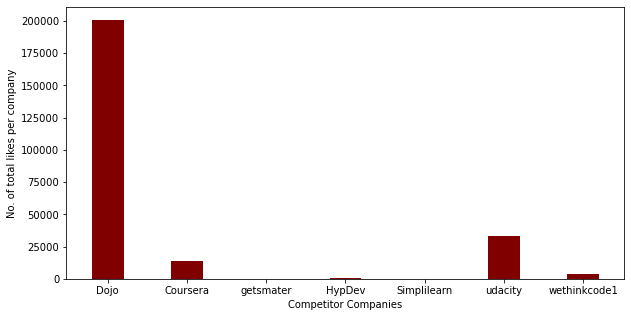

In [98]:
data = {'Dojo':Dojo1, 'Coursera':Coursera1, 'getsmater':getsmater1,
        'HypDev':HypDev1, 'Simplilearn':Simplilearn1 , 'udacity':udacity1, 'wethinkcode1':wethinkcode1}
companies = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(companies, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Competitor Companies")
plt.ylabel("No. of total likes per company")
plt.show()

In [99]:
Simplilearn1

0

In [100]:
getsmater1

0

In [101]:
HypDev1

796

In [102]:
#maximum likes for Dojo company
dfl1 = df_all_rows[df_all_rows['Username'] == 'DataScienceDojo']
maxlikes = dfl1['likeCount'].max()
dfl1 = df_all_rows[df_all_rows['likeCount'] == maxlikes]
when = dfl1[['year','month','day','hour','minutes','seconds']]
print(when)

      year  month  day  hour  minutes  seconds
1747  2021     11   19    16       30        0


In [103]:
dfl2 = df_all_rows[df_all_rows['Username'] == 'coursera']
maxlikes1 = dfl2['likeCount'].max()
dfl2 = df_all_rows[df_all_rows['likeCount'] == maxlikes1]
when1 = dfl2[['year','month','day','hour','minutes','seconds']]
print(when1)

      year  month  day  hour  minutes  seconds
2000  2021      3   11    15       47        4


In [104]:
dfl3 = df_all_rows[df_all_rows['Username'] == 'getsmater']
maxlikes2 = dfl3['likeCount'].max()
dfl3 = df_all_rows[df_all_rows['likeCount'] == maxlikes2]
when2 = dfl3[['year','month','day','hour','minutes','seconds']]
print(when2)

Empty DataFrame
Columns: [year, month, day, hour, minutes, seconds]
Index: []


In [105]:
dfl4 = df_all_rows[df_all_rows['Username'] == 'HypDev']
maxlikes3 = dfl4['likeCount'].max()
dfl4 = df_all_rows[df_all_rows['likeCount'] == maxlikes3]
when3 = dfl4[['year','month','day','hour','minutes','seconds']]
print(when3)

      year  month  day  hour  minutes  seconds
381   2022      3    3    15        8       11
733   2022      2    5    21        2        0
736   2022      2    5     3        9       59
977   2022      1   19    18       30        0
1229  2021     12   30     3        3        0
1515  2021     12    7     2       30        0
2147  2021     10   23     0       30        0
2393  2021     10    5    14        8        2
2904  2021      8   25     0       30        0
76    2022      3   10    17        7       48
308   2022      2   16    17       47        1
509   2022      1    5    18       45        1
679   2021     12    9    21        3       46
744   2021     11   19    20       35       23
1097  2021     10    5    18       25        4
1183  2021      9   19    14        4        0
1304  2021      8   28    14       25        0
1545  2021      6   30    14       20        1
1628  2021      6   15    18       53       18
1767  2021      5   21    19       26        1
1796  2021   

In [106]:
dfl5 = df_all_rows[df_all_rows['Username'] == 'Simplilearn']
maxlikes4 = dfl5['likeCount'].max()
dfl5 = df_all_rows[df_all_rows['likeCount'] == maxlikes4]
when4 = dfl5[['year','month','day','hour','minutes','seconds']]
print(when4)

Empty DataFrame
Columns: [year, month, day, hour, minutes, seconds]
Index: []


In [107]:
dfl6 = df_all_rows[df_all_rows['Username'] == 'udacity']
maxlikes5 = dfl6['likeCount'].max()
dfl6 = df_all_rows[df_all_rows['likeCount'] == maxlikes5]
when5 = dfl6[['year','month','day','hour','minutes','seconds']]
print(when5)

     year  month  day  hour  minutes  seconds
500  2021      8   23    22       18       28


In [108]:
dfl7 = df_all_rows[df_all_rows['Username'] == 'wethinkcode']
maxlikes6 = dfl7['likeCount'].max()
dfl7 = df_all_rows[df_all_rows['likeCount'] == maxlikes6]
when6 = dfl7[['year','month','day','hour','minutes','seconds']]
print(when6)

     year  month  day  hour  minutes  seconds
546  2021      8    7    18        0       10
603  2021      7   19    20       15        8
225  2021      1    5     6       25        0


In [109]:
#type of media posted
med = dfl1['Media']
print(med)

1747    [Photo(previewUrl='https://pbs.twimg.com/media...
Name: Media, dtype: object


In [110]:
med1 = dfl2['Media']
print(med1)

2000    NaN
Name: Media, dtype: object


In [111]:
med2 = dfl3['Media']
print(med2)

Series([], Name: Media, dtype: object)


In [112]:
med3 = dfl4['Media']
print(med3)

381     [Photo(previewUrl='https://pbs.twimg.com/media...
733     [Photo(previewUrl='https://pbs.twimg.com/media...
736                                                   NaN
977     [Photo(previewUrl='https://pbs.twimg.com/media...
1229    [Photo(previewUrl='https://pbs.twimg.com/media...
1515    [Photo(previewUrl='https://pbs.twimg.com/media...
2147    [Photo(previewUrl='https://pbs.twimg.com/media...
2393    [Photo(previewUrl='https://pbs.twimg.com/media...
2904    [Photo(previewUrl='https://pbs.twimg.com/media...
76                                                    NaN
308                                                   NaN
509                                                   NaN
679                                                   NaN
744                                                   NaN
1097                                                  NaN
1183                                                  NaN
1304                                                  NaN
1545          

In [113]:
med4 = dfl5['Media']
print(med4)

Series([], Name: Media, dtype: object)


In [114]:
med5 = dfl6['Media']
print(med5)

500    NaN
Name: Media, dtype: object


In [115]:
med6 = dfl7['Media']
print(med6)

546    [Photo(previewUrl='https://pbs.twimg.com/media...
603    [Video(thumbnailUrl='https://pbs.twimg.com/med...
225    [Photo(previewUrl='https://pbs.twimg.com/media...
Name: Media, dtype: object


In [138]:
def plot_df(DataScienceDojo, x, y, title="", xlabel='Datetime', ylabel='likeCount', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [139]:
 plot_df(DataScienceDojo, x=DataScienceDojo.Datetime, y=DataScienceDojo.likeCount)

KeyboardInterrupt: 